In [41]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [42]:
data = pd.read_csv("listings.csv")

In [43]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [44]:
#Removing unneccessary information such as jurisdiction name 
#which is the same for all rows and experiences offered which is none for all rows.

data = data[["id", "host_response_time", "host_response_rate", "host_is_superhost","property_type",
             "room_type","accommodates","bathrooms","bedrooms","beds","amenities","price",
             "instant_bookable","cancellation_policy",
             "review_scores_rating","number_of_reviews"]]


In [45]:
data.head()

,id,host_response_time,host_response_rate,host_is_superhost,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,instant_bookable,cancellation_policy,review_scores_rating,number_of_reviews
0,241032,within a few hours,96%,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,f,moderate,95.0,207
1,953595,within an hour,98%,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,f,strict,96.0,43
2,3308979,within a few hours,67%,f,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$975.00,f,strict,97.0,20
3,7421966,NaN,NaN,f,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",$100.00,f,flexible,NaN,0
4,278830,within an hour,100%,f,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",$450.00,f,strict,92.0,38


In [46]:
# Note >100 missing values for host_response_time, host_response_rate, review_scores_rating

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
id                      3818 non-null int64
host_response_time      3295 non-null object
host_response_rate      3295 non-null object
host_is_superhost       3816 non-null object
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
beds                    3817 non-null float64
amenities               3818 non-null object
price                   3818 non-null object
instant_bookable        3818 non-null object
cancellation_policy     3818 non-null object
review_scores_rating    3171 non-null float64
number_of_reviews       3818 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 477.4+ KB


In [47]:
len(data.dropna())/len(data)

0.7441068622315349

In [48]:
data = data.dropna()

In [49]:
def rate_to_float(x):
    if type(x) == str:
        substr = x[:-1]
        return float(substr)

data["host_response_rate"] = data["host_response_rate"].map(rate_to_float)

In [50]:
#response rate become float type instead

data["host_response_rate"].head()

0     96.0
1     98.0
2     67.0
4    100.0
6    100.0
Name: host_response_rate, dtype: float64

In [51]:
def price_to_float(x):
    if type(x) == str:
        substr = x.replace(",","")
        substr = substr[1:]
        return float(substr)

data["price"] = data["price"].map(price_to_float)

In [52]:
#convert price to float type

data["price"].head()

0     85.0
1    150.0
2    975.0
4    450.0
6     80.0
Name: price, dtype: float64

In [53]:
#Use number of amenities available instead

data["amenities"] = data["amenities"].map(lambda x: len(x.split(",")))

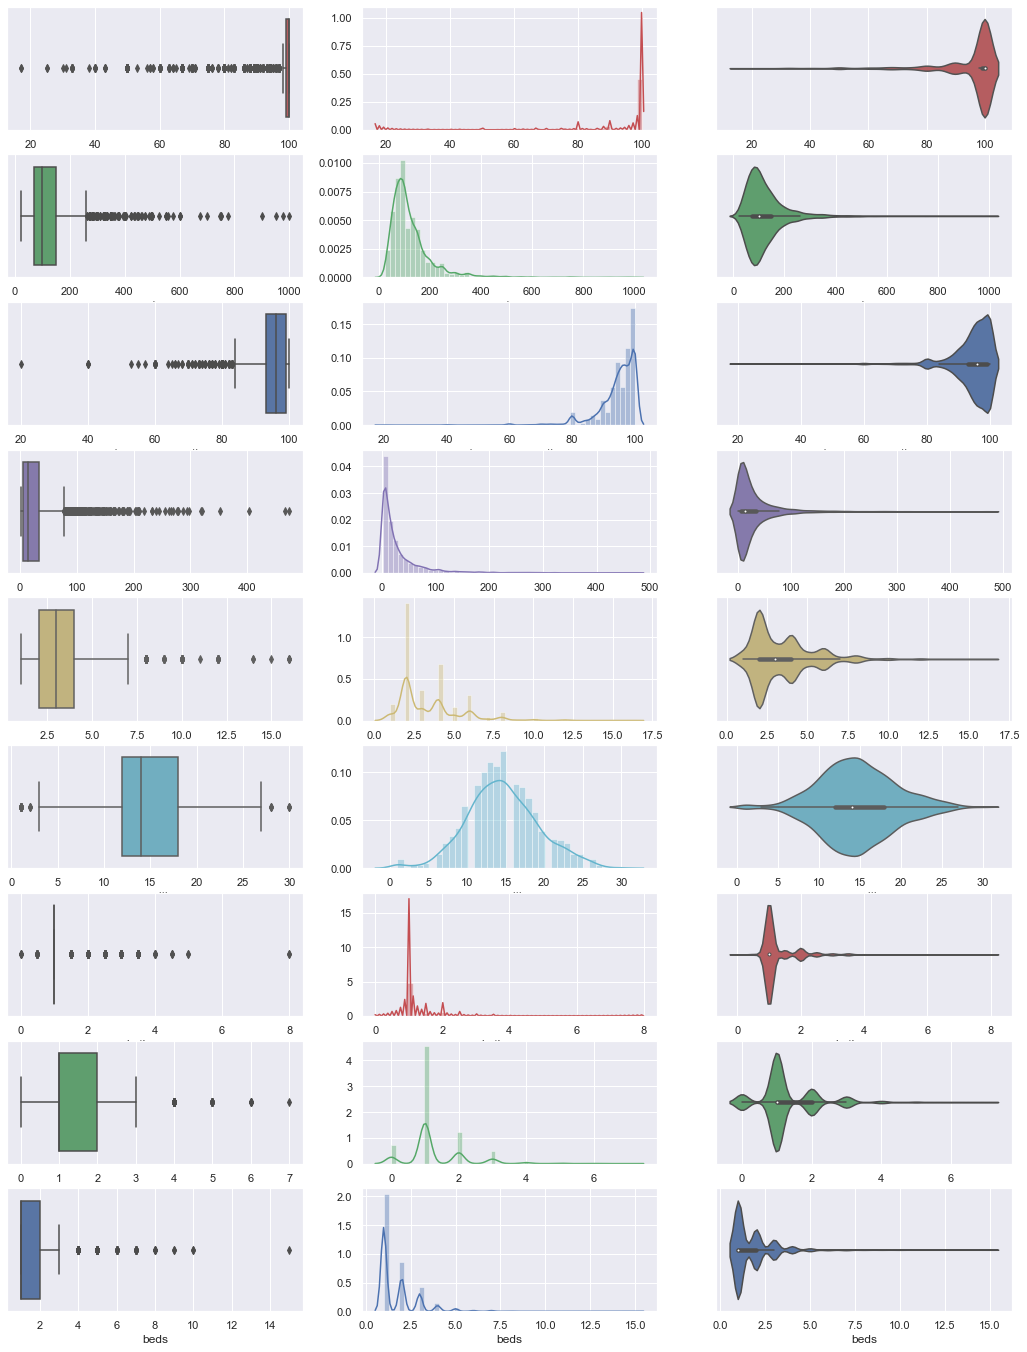

In [54]:
numeric_data = data[["host_response_rate","price","review_scores_rating","number_of_reviews",
                     "accommodates","amenities","bathrooms","bedrooms","beds"]]
f, axes = plt.subplots(9, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m","y","c","r","g","b"]

count = 0
for var in numeric_data:
    sb.boxplot(numeric_data[var].dropna(), orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric_data[var].dropna(), color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric_data[var].dropna(), color = colors[count], ax = axes[count,2])
    count += 1

In [55]:
numeric_data.corr()

,host_response_rate,price,review_scores_rating,number_of_reviews,accommodates,amenities,bathrooms,bedrooms,beds
host_response_rate,1.000000,-0.038059,0.157900,0.103129,-0.005169,0.119949,0.004527,-0.011504,0.007529
price,-0.038059,1.000000,0.043389,-0.123171,0.667733,0.201802,0.513768,0.633774,0.601586
review_scores_rating,0.157900,0.043389,1.000000,0.038804,-0.021467,0.155287,0.036210,0.012522,-0.006697
number_of_reviews,0.103129,-0.123171,0.038804,1.000000,-0.095161,-0.024088,-0.106009,-0.110758,-0.105356
accommodates,-0.005169,0.667733,-0.021467,-0.095161,1.000000,0.276735,0.514216,0.768002,0.863937
amenities,0.119949,0.201802,0.155287,-0.024088,0.276735,1.000000,0.120282,0.173778,0.221341
bathrooms,0.004527,0.513768,0.036210,-0.106009,0.514216,0.120282,1.000000,0.594399,0.515221
bedrooms,-0.011504,0.633774,0.012522,-0.110758,0.768002,0.173778,0.594399,1.000000,0.749326
beds,0.007529,0.601586,-0.006697,-0.105356,0.863937,0.221341,0.515221,0.749326,1.000000


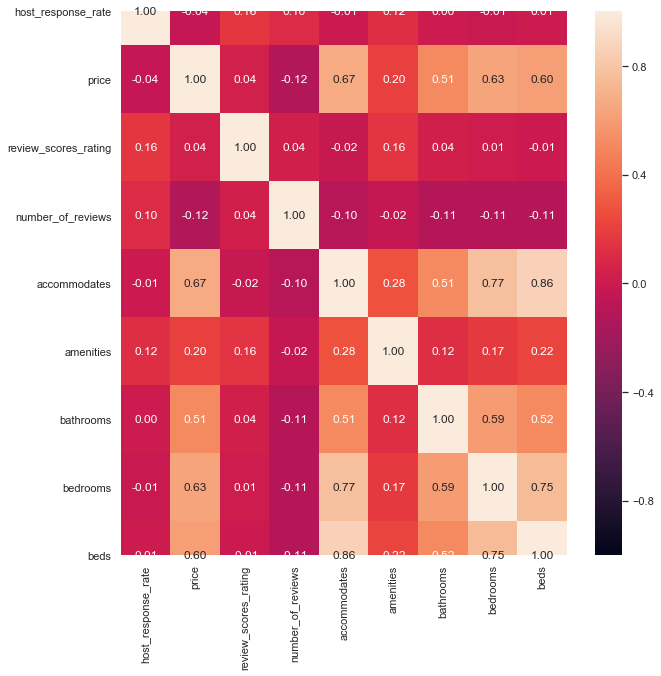

In [56]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

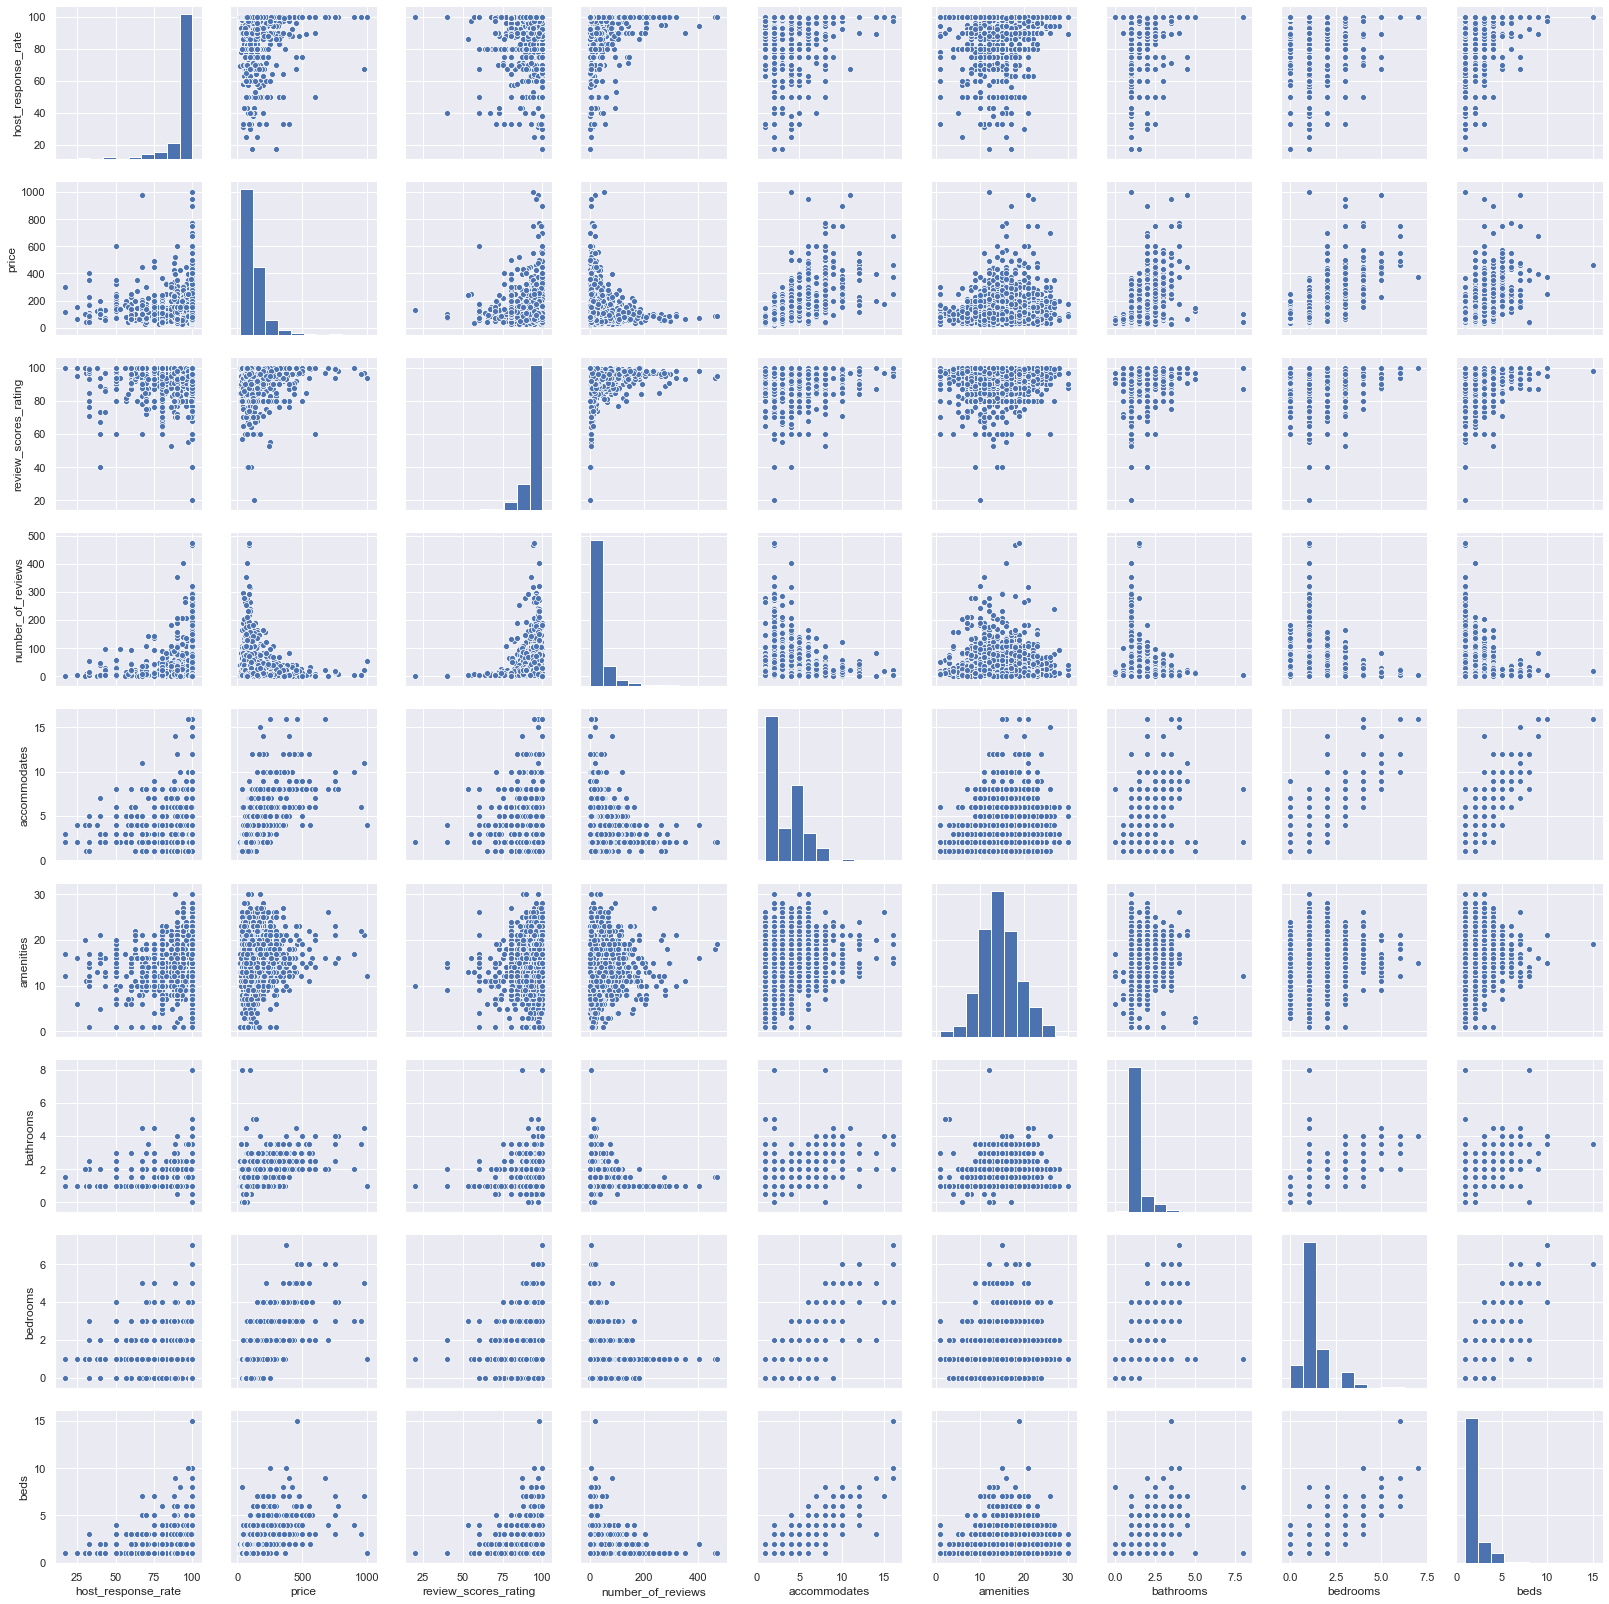

In [57]:
sb.pairplot(data = numeric_data)

In [58]:
#We will now convert categorical variables into dummy columns 

data["host_response_time"].value_counts()



within an hour        1517
within a few hours     830
within a day           466
a few days or more      28
Name: host_response_time, dtype: int64

In [59]:
data.groupby("host_response_time").price.mean()

host_response_time
a few days or more    135.285714
within a day          134.781116
within a few hours    134.057831
within an hour        114.434410
Name: price, dtype: float64

In [60]:
data["host_is_superhost"].value_counts()

f    2122
t     719
Name: host_is_superhost, dtype: int64

In [61]:
data.groupby("host_is_superhost").price.mean()

host_is_superhost
f    122.287465
t    127.909597
Name: price, dtype: float64

In [62]:
data["property_type"].value_counts()

House              1303
Apartment          1278
Townhouse            74
Condominium          66
Loft                 31
Bed & Breakfast      25
Cabin                20
Other                17
Camper/RV             9
Bungalow              9
Boat                  3
Dorm                  2
Tent                  1
Chalet                1
Yurt                  1
Treehouse             1
Name: property_type, dtype: int64

In [63]:
data.groupby("property_type").price.mean()

property_type
Apartment          122.480438
Bed & Breakfast     89.560000
Boat               318.333333
Bungalow            98.222222
Cabin              103.650000
Camper/RV           78.444444
Chalet             135.000000
Condominium        147.924242
Dorm                39.500000
House              125.276285
Loft               139.806452
Other               94.882353
Tent                25.000000
Townhouse          118.135135
Treehouse           48.000000
Yurt               100.000000
Name: price, dtype: float64

In [64]:
data["room_type"].value_counts()

Entire home/apt    1900
Private room        850
Shared room          91
Name: room_type, dtype: int64

In [65]:
data.groupby("room_type").price.mean()

room_type
Entire home/apt    151.489474
Private room        70.138824
Shared room         44.098901
Name: price, dtype: float64

In [66]:
data["instant_bookable"].value_counts()

f    2328
t     513
Name: instant_bookable, dtype: int64

In [67]:
data.groupby("instant_bookable").price.mean()

instant_bookable
f    124.426546
t    120.460039
Name: price, dtype: float64

In [68]:
data["cancellation_policy"].value_counts()

strict      1155
moderate    1012
flexible     674
Name: cancellation_policy, dtype: int64

In [69]:
data.groupby("cancellation_policy").price.mean()

cancellation_policy
flexible     98.176558
moderate    110.073123
strict      150.559307
Name: price, dtype: float64

In [70]:
non_numeric_data = data[["host_response_time","host_is_superhost",
                        "property_type","room_type","instant_bookable","cancellation_policy"]]

In [71]:
dummies = pd.get_dummies(non_numeric_data)

In [72]:
dummies.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [73]:
data = data.drop(["host_response_time","host_is_superhost",
                        "property_type","room_type","instant_bookable","cancellation_policy"],axis = 1)

In [74]:
data = pd.merge(data,dummies,left_index = True,right_index = True)

In [75]:
# Replaced all categorical variable columns with dummy variables instead
data.head()

,id,host_response_rate,accommodates,bathrooms,bedrooms,beds,amenities,price,review_scores_rating,number_of_reviews,...,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,241032,96.0,4,1.0,1.0,1.0,10,85.0,95.0,207,...,0,0,1,0,0,1,0,0,1,0
1,953595,98.0,4,1.0,1.0,1.0,16,150.0,96.0,43,...,0,0,1,0,0,1,0,0,0,1
2,3308979,67.0,11,4.5,5.0,7.0,21,975.0,97.0,20,...,0,0,1,0,0,1,0,0,0,1
4,278830,100.0,6,2.0,3.0,3.0,13,450.0,92.0,38,...,0,0,1,0,0,1,0,0,0,1
6,1909058,100.0,2,1.0,1.0,1.0,7,80.0,99.0,58,...,0,0,0,1,0,1,0,0,1,0


In [76]:
# Start with prediction model
y = pd.DataFrame(data["price"])
x = pd.DataFrame(data.drop("price",axis = 1))

In [77]:
#Hold out 25% of the data for testing model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [78]:
#Size of training set and test set

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (2130, 1) (2130, 39)
Test Set  : (711, 1) (711, 39)


In [79]:
x_train.describe()

,id,host_response_rate,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,number_of_reviews,host_response_time_a few days or more,...,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
count,2.130000e+03,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,...,2130.0,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,5.042202e+06,95.228169,3.390141,1.252113,1.293897,1.751643,14.662441,94.526291,28.468545,0.010329,...,0.0,0.000469,0.661033,0.308920,0.030047,0.822066,0.177934,0.236620,0.355869,0.407512
std,2.858391e+06,11.252161,2.028541,0.581181,0.876074,1.183418,4.584589,6.596219,41.642377,0.101127,...,0.0,0.021668,0.473470,0.462157,0.170757,0.382547,0.382547,0.425107,0.478888,0.491487
min,4.291000e+03,17.000000,1.000000,0.000000,0.000000,1.000000,1.000000,20.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.579879e+06,98.000000,2.000000,1.000000,1.000000,1.000000,12.000000,93.000000,5.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.293218e+06,100.000000,3.000000,1.000000,1.000000,1.000000,15.000000,96.000000,14.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.571959e+06,100.000000,4.000000,1.000000,2.000000,2.000000,17.000000,99.000000,34.000000,0.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.024814e+07,100.000000,16.000000,8.000000,7.000000,15.000000,30.000000,100.000000,474.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
y_train.describe()

,price
count,2130.000000
mean,123.490141
std,89.789761
min,22.000000
25%,70.000000
50%,99.000000
75%,149.000000
max,999.000000


In [81]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-4.49510094]
Coefficients of Regression 	: a =  [[-8.17516484e-07 -2.00283025e-01  9.31299107e+00  3.42611682e+01
   2.97694417e+01 -3.86192605e-01  1.00007288e-01  4.88320345e-01
  -9.05313358e-02  1.26146672e+01 -2.49430579e+00  1.40331541e+00
  -1.15236769e+01 -4.74116412e+00  4.74116412e+00 -9.17353295e+00
  -2.73888717e+01  1.88800386e+02  5.64507676e+00 -1.92193157e+01
  -2.14356391e+01 -6.11310826e+00 -4.22977580e+00 -2.91224341e+01
  -2.30919057e+01  1.19790093e+01 -2.21580004e+01 -2.07432944e+01
  -2.54872853e+01  1.42108547e-14  1.73869096e+00  3.23423752e+01
  -5.16717823e+00 -2.71751970e+01 -2.31879879e+00  2.31879879e+00
  -1.59924602e+00 -3.76989206e+00  5.36913808e+00]]



,Predictors,Coefficients
0,id,-8.175165e-07
1,host_response_rate,-2.002830e-01
2,accommodates,9.312991e+00
3,bathrooms,3.426117e+01
4,bedrooms,2.976944e+01
5,beds,-3.861926e-01
6,amenities,1.000073e-01
7,review_scores_rating,4.883203e-01
8,number_of_reviews,-9.053134e-02
9,host_response_time_a few days or more,1.261467e+01


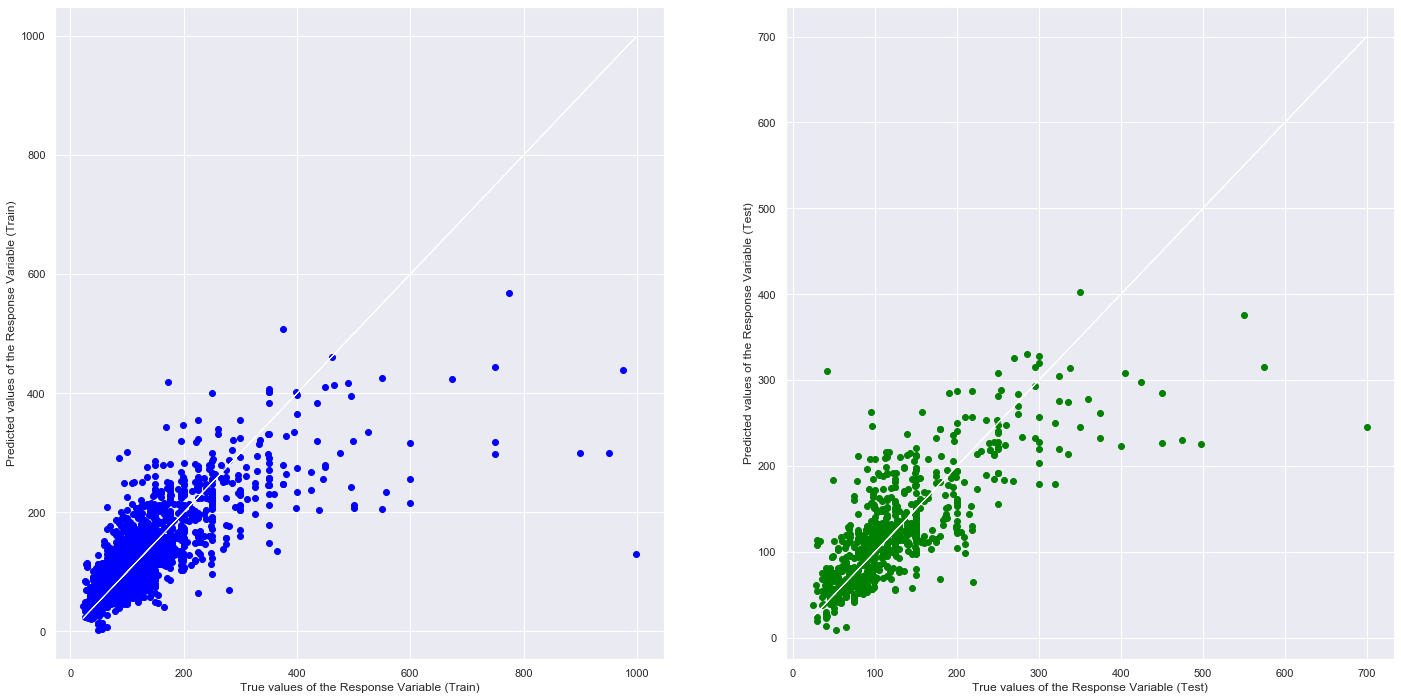

In [82]:
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

#Plot of predicted value against actual value
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5716452232653979
Mean Squared Error (MSE) 	: 3451.861029341527

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5884812307048516
Mean Squared Error (MSE) 	: 2564.721399943898



In [84]:
MSE_train = mean_squared_error(y_train, y_train_pred)
StdE_pred = np.sqrt(len(y_train) * MSE_train/(len(y_train) - 2))

print("Mean Squared Error (MSE) \t:", MSE_train.round(2))
print("Pred Standard Error (SE) \t:", StdE_pred.round(2))

Mean Squared Error (MSE) 	: 3451.86
Pred Standard Error (SE) 	: 58.78
